In [157]:
import pandas as pd

url = 'C:/Users/touri/OneDrive/Desktop/KNNwineColor/KNNwineColor/winequality-merged.csv'

arquivo = pd.read_csv(url)
arquivo.head()

# SMOTE para balancear

# KNN para classificar cor do vinho baseado em outras feats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [158]:
# Informações gerais sobre o dataset
print(arquivo.info())

# Descrição estatística das variáveis numéricas
print(arquivo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

In [159]:
print(arquivo['color'].value_counts())

color
white    4898
red      1599
Name: count, dtype: int64


In [160]:
twice = arquivo[arquivo.duplicated()]
twice.shape

(1176, 13)

In [161]:
wine = arquivo.drop_duplicates(keep='first')
wine.shape

(5321, 13)

In [162]:
from sklearn.preprocessing import LabelEncoder

# 0 = red         1 = white
label_encoder = LabelEncoder()
arquivo['color'] = label_encoder.fit_transform(arquivo['color'])

# Display the first few rows of the DataFrame
print(arquivo.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6      1  
1      9.5        6      1  

In [163]:
y = arquivo['quality']
X = arquivo.drop('quality', axis = 1)

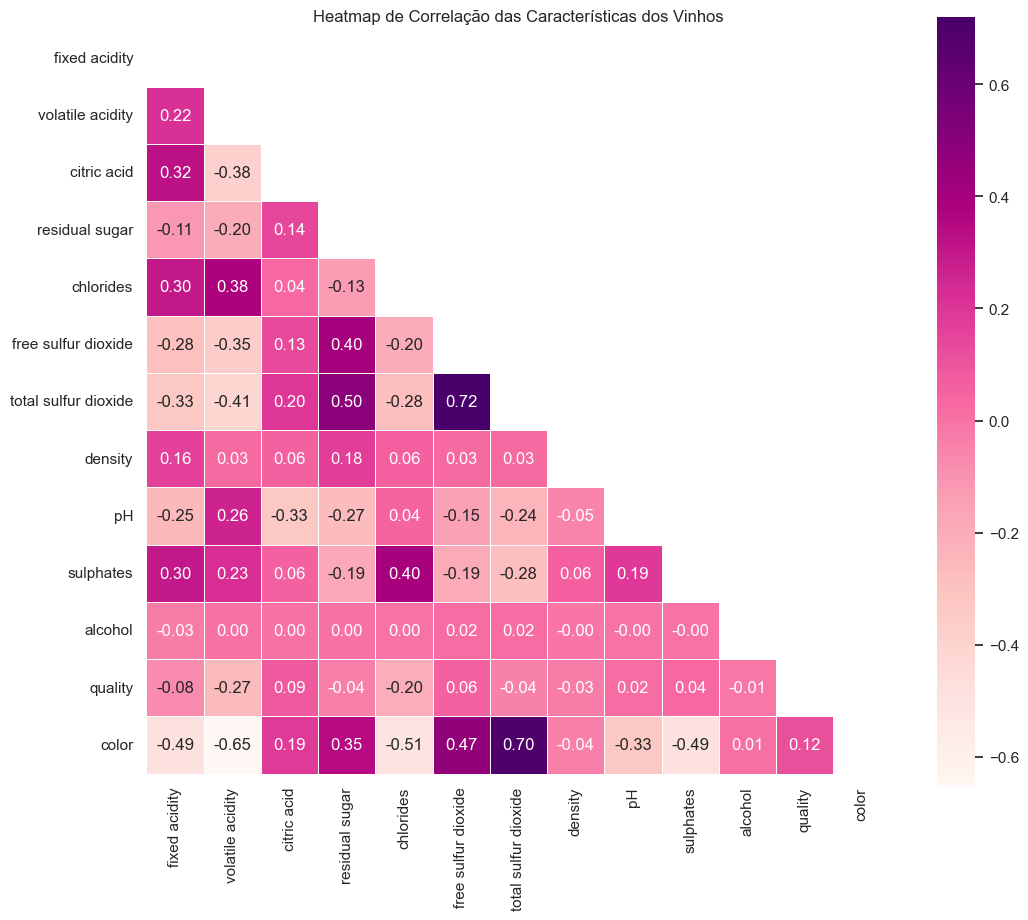

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data_path = 'winequality-merged.csv'  # Ajuste o caminho do arquivo conforme necessário
wine_data = pd.read_csv(data_path)

# Mapear a cor do vinho para valores numéricos para facilitar a correlação
wine_data['color'] = wine_data['color'].map({'red': 0, 'white': 1})

# Calcular a matriz de correlação
correlation_matrix = wine_data.corr()

# Criar uma máscara para ocultar a diagonal superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar o ambiente de visualização com Seaborn
sns.set(style="white")

# Gerar um mapa de calor com as correlações
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='RdPu', square=True, linewidths=0.5)
plt.title('Heatmap de Correlação das Características dos Vinhos')
plt.show()


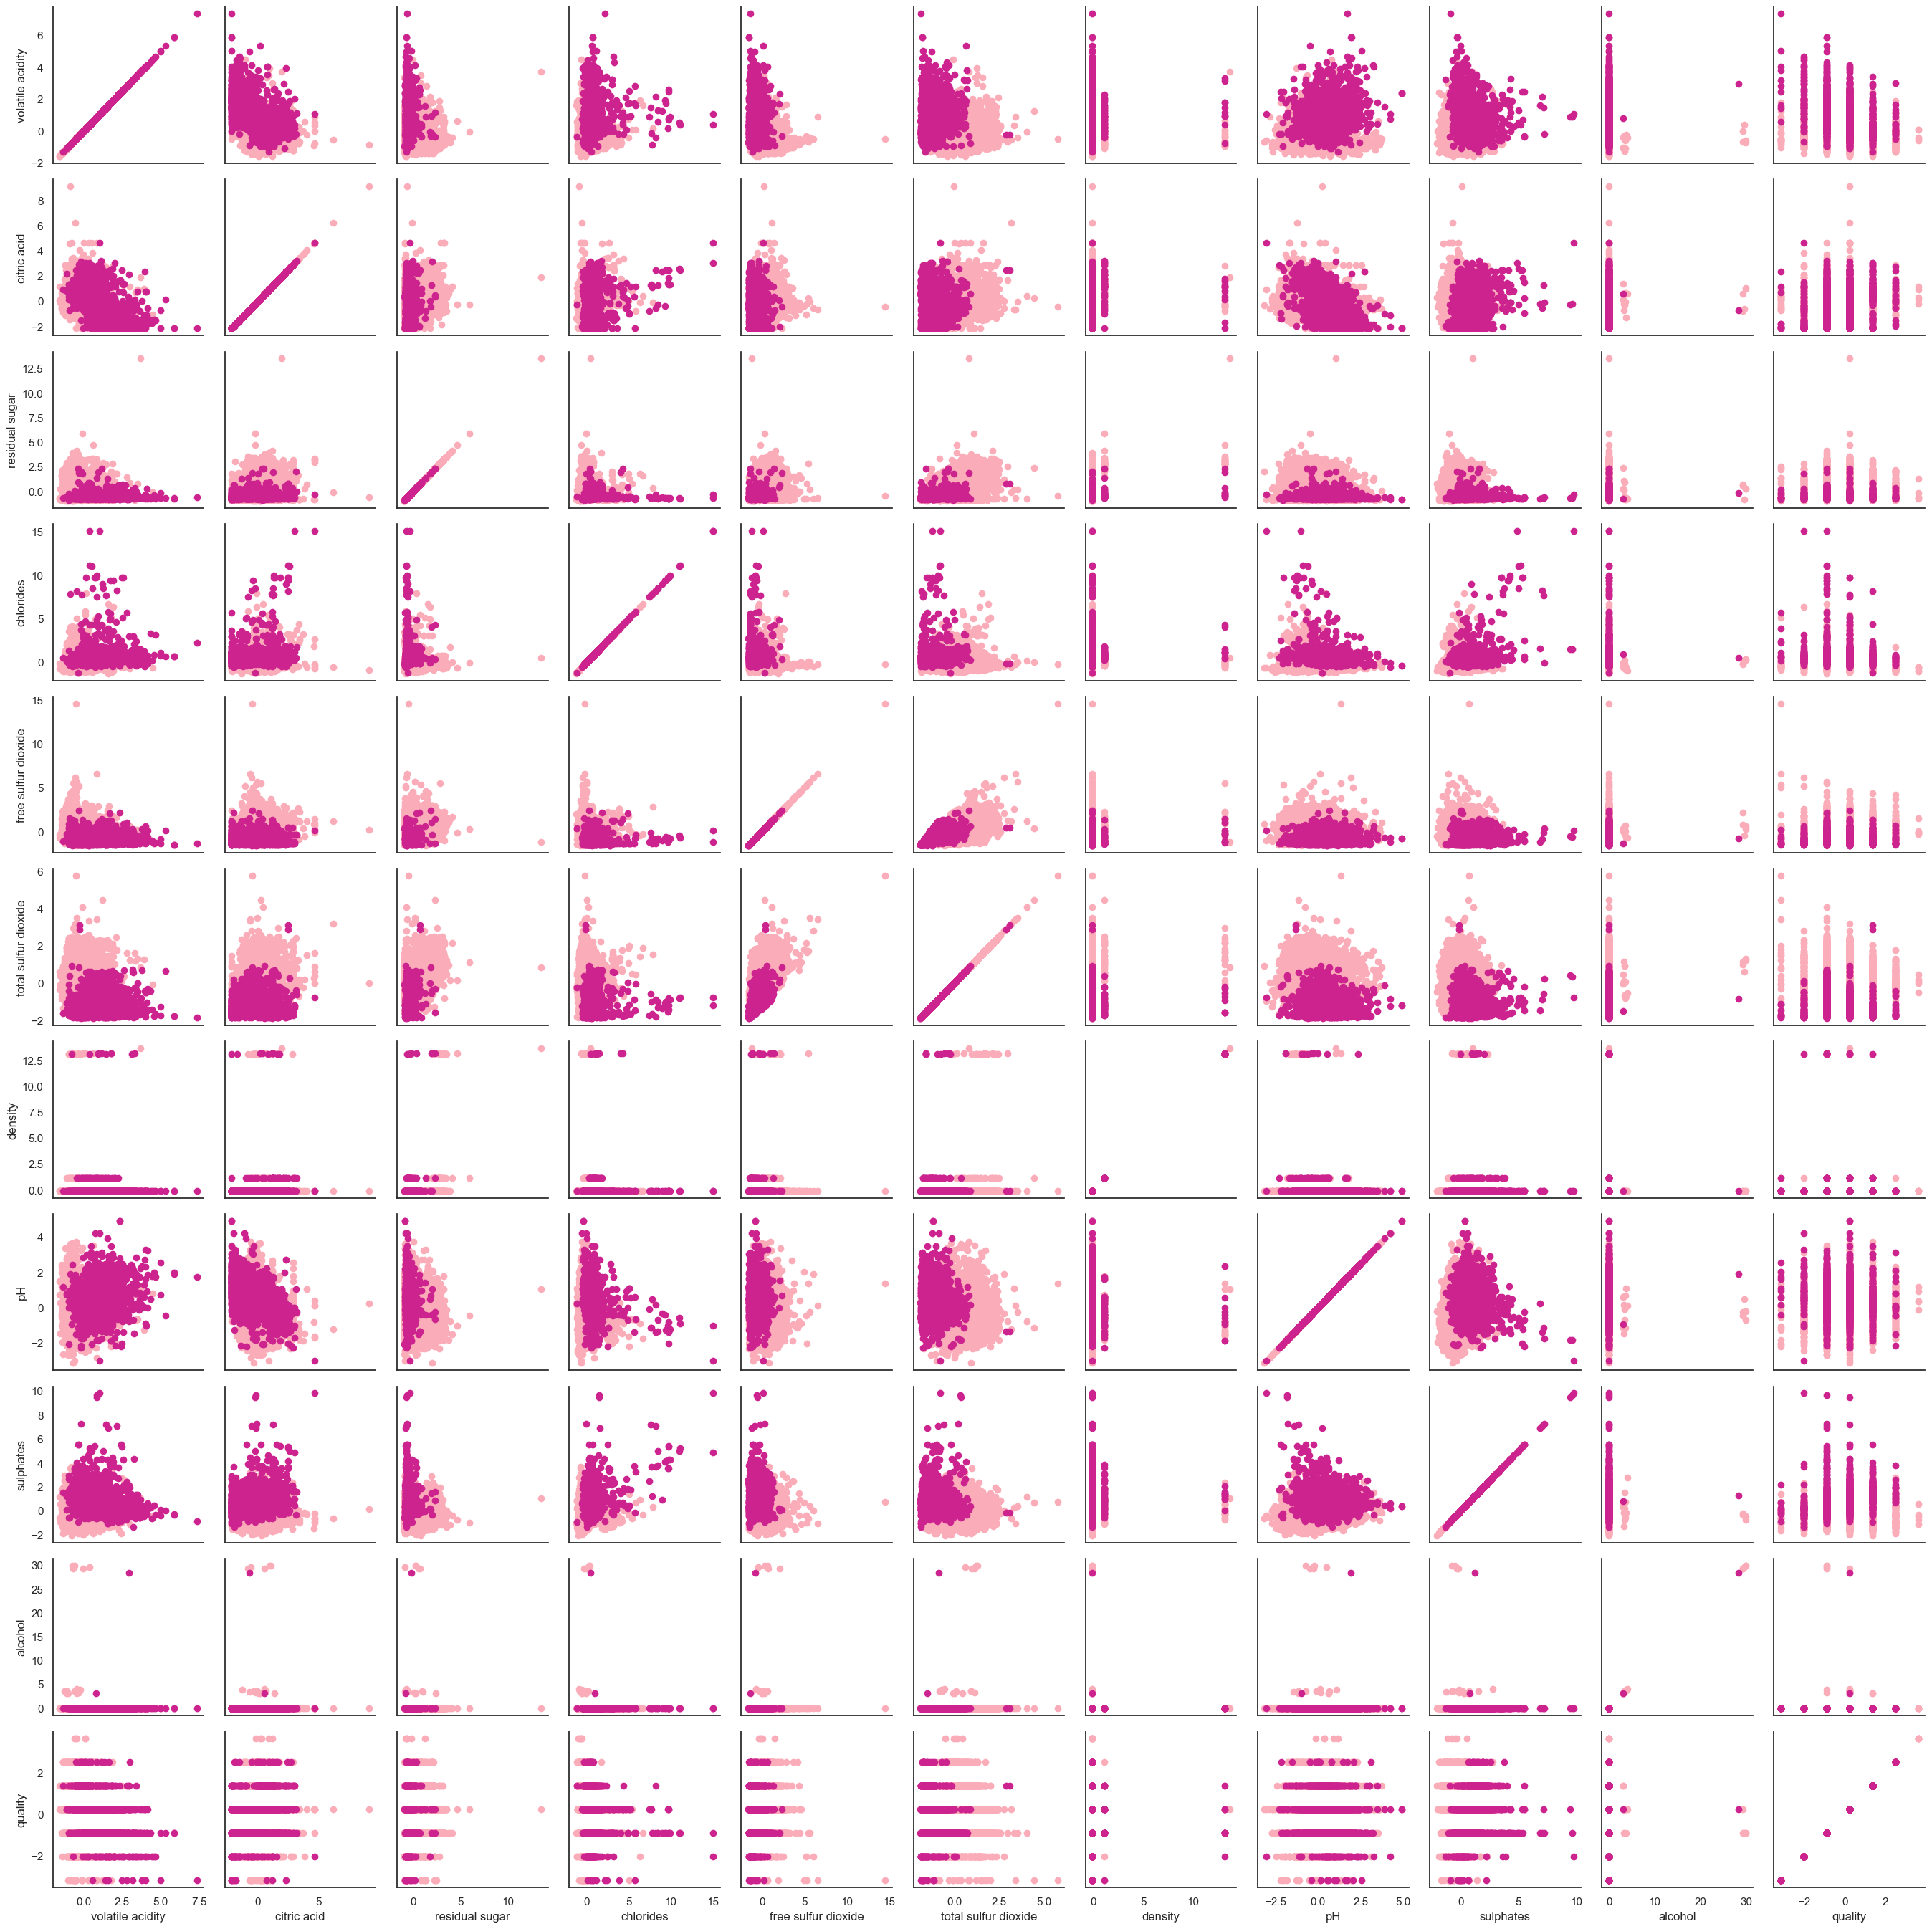

In [165]:
from sklearn.preprocessing import StandardScaler

wine_scale = wine.copy()
scaler = StandardScaler()
columns = wine.columns[0:12]
wine_scale[columns] = scaler.fit_transform(wine_scale[columns])
wine_scale.head()

g = sns.PairGrid(wine_scale.iloc[:,1:13], hue="color", palette="RdPu")
g.map(plt.scatter) 

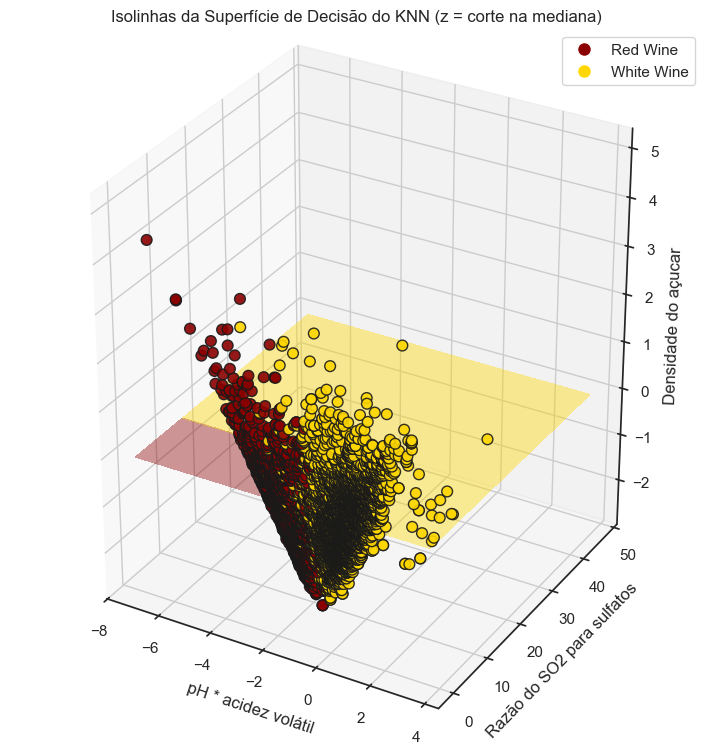

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# 1. Carregar e preparar o dataset
file_path = "winequality-merged.csv"
wine_data = pd.read_csv(file_path)

# Criação de features combinadas (opcional)
wine_data["pH_vol_acid"] = wine_data["pH"] * wine_data["volatile acidity"]
wine_data["SO2_sulfates_ratio"] = wine_data["total sulfur dioxide"] / (wine_data["sulphates"] + 1e-6)
wine_data["sugar_density"] = wine_data["residual sugar"] * wine_data["density"]

# Selecionar features para visualização
features = ["pH_vol_acid", "SO2_sulfates_ratio", "sugar_density"]
X = wine_data[features]
y = wine_data["color"].map({"red": 0, "white": 1})  # 0 = Red, 1 = White

# 2. Padronizar e aplicar PCA (3 componentes para visualização 3D)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3. Treinar um KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn.fit(X_pca, y)

# 4. Criar um plano 2D dentro do espaço 3D (fixado em z)
#    Usamos a mediana do eixo Z como corte
plane_z = np.median(X_pca[:, 2])

# Definir a resolução do grid para os eixos x e y
grid_size = 200
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size))
# Criar o plano fixo em z = plane_z
zz = np.full_like(xx, plane_z)

# Empilhar e prever a probabilidade de ser "White"
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
prob_white = knn.predict_proba(grid_points)[:, 1]  # probabilidade da classe 1 (White)
prob_white = prob_white.reshape(xx.shape)

# 5. Plotar o resultado em 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Ajustar a proporção para evitar distorção; a parte do eixo z foi aumentada
ax.set_box_aspect((1, 1, 1.2))

# Definir limites do eixo z para ampliar a visualização
z_min = X_pca[:, 2].min() - 1.0
z_max = X_pca[:, 2].max() + 1.0
ax.set_zlim(z_min, z_max)

# Definir colormap para probabilidades (0 = Red, 1 = Gold)
cmap = ListedColormap(["darkred", "gold"])

# Plotar os pontos reais do dataset com menor transparência
colors = np.array(["darkred", "gold"])
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           c=colors[y], edgecolors='k', alpha=0.9, s=60, label="Data Points")

# Plotar a "fatia" (plano) em z = plane_z com isolinhas de probabilidade
# Níveis: [0, 0.5, 1] onde 0.5 é a fronteira de decisão
ax.contourf(xx, yy, prob_white, zdir='z', offset=plane_z,
            levels=[0, 0.5, 1], alpha=0.4, cmap=cmap)

# 6. Ajustar rótulos e título
ax.set_xlabel("pH * acidez volátil") # vinhos melhores possuem menos para evitar acido acetico
ax.set_ylabel("Razão do SO2 para sulfatos") # conservante so2 e sulfatos ajuda a entender como o vinho foi guardado podendo alterar cor
ax.set_zlabel("Densidade do açucar") # vinhos tintos tem menos acucar residual
ax.set_title("Isolinhas da Superfície de Decisão do KNN (z = corte na mediana)")

# 7. Criar legenda customizada
legend_labels = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markersize=10, label="Red Wine"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label="White Wine")
]
ax.legend(handles=legend_labels, loc="upper right")

plt.show()


c:\Users\touri\OneDrive\Desktop\KNNwineColor\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


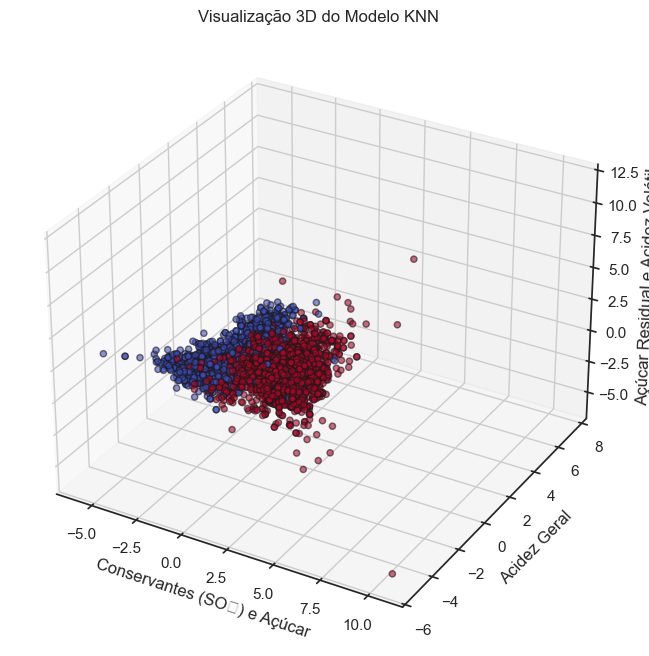

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Carregar o dataset
data_path = 'winequality-merged.csv'
wine_data = pd.read_csv(data_path)

# Mapear 'color' para numérico
wine_data['color'] = wine_data['color'].map({'red': 0, 'white': 1})

# Selecionar features mais relevantes
features = ['total sulfur dioxide', 'residual sugar', 'free sulfur dioxide', 
            'volatile acidity', 'citric acid']

X = wine_data[features]
y = wine_data['color']

# Padronizar os dados para todas as variaveis terem o mesmo peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir a dimensionalidade para 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn.fit(X_pca, y)

# Criar um grid de pontos para visualizar a superfície de decisão
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
z_min, z_max = X_pca[:, 2].min() - 1, X_pca[:, 2].max() + 1
# Calcula matriz de covariancia e gera os autovalores e autovetores para encontrar as direcoes principais nos dados
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50),
                         np.linspace(z_min, z_max, 50))

grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
preds = knn.predict(grid_points).reshape(xx.shape)

# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar pontos de decisão
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="coolwarm", edgecolor="k", alpha=0.6)

# Definir limites do eixo Z para ampliar a visualização
z_min = X_pca[:, 2].min() - 1.0
z_max = X_pca[:, 2].max() + 1.0
ax.set_zlim(z_min, z_max)

# Definir rótulos dos eixos
ax.set_xlabel("Conservantes (SO₂) e Açúcar")
ax.set_ylabel("Acidez Geral")
ax.set_zlabel("Açúcar Residual e Acidez Volátil")
ax.set_title("Visualização 3D do Modelo KNN")

# Exibir o gráfico
plt.show()

In [168]:
# Mostrar a variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variância explicada por cada componente: {explained_variance}")

# Exibir a soma das variâncias para verificar se os 3 componentes são suficientes
print(f"🔎 Soma da variância explicada: {explained_variance.sum():.4f}")

📊 Variância explicada por cada componente: [0.48950427 0.21403545 0.1392104 ]
🔎 Soma da variância explicada: 0.8428


#### - PC1 separa bem os vinhos tintos e brancos com base no SO₂ e no açúcar residual.
#### - PC2 captura informações sobre a acidez, que também diferencia vinhos.
#### - PC3 pode ajudar a distinguir vinhos mais doces.

#### Com a soma da variância em 84% capturam quase toda informação do dataset original

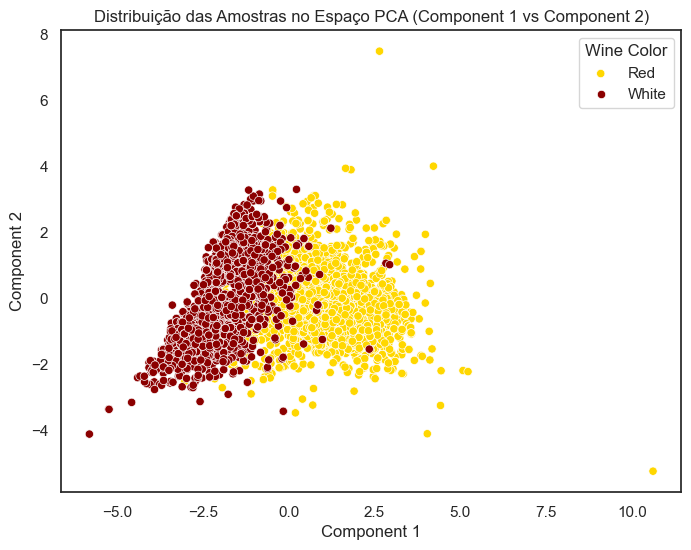

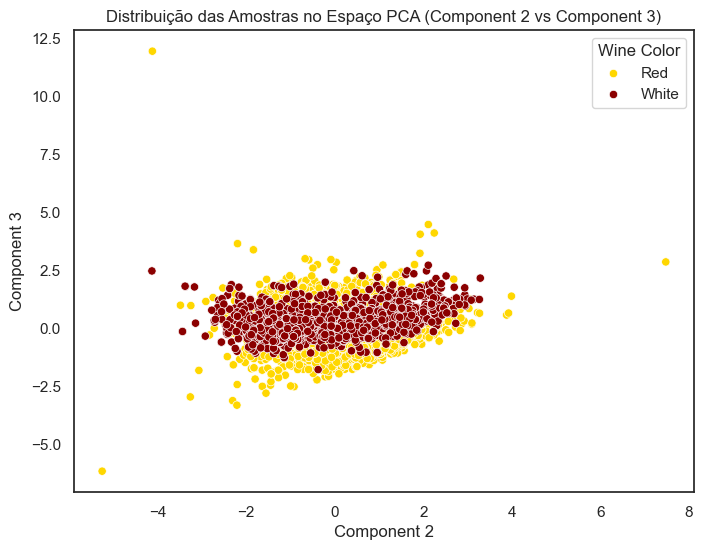

In [169]:
import seaborn as sns

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2', 'Component 3'])
pca_df['color'] = y  # Adicionar a variável target

# Scatter plot entre os componentes 1 e 2
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['Component 1'], y=pca_df['Component 2'], hue=pca_df['color'], palette={0: "darkred", 1: "gold"})
plt.title("Distribuição das Amostras no Espaço PCA (Component 1 vs Component 2)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Wine Color", labels=["Red", "White"])
plt.show()

# Scatter plot entre os componentes 2 e 3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['Component 2'], y=pca_df['Component 3'], hue=pca_df['color'], palette={0: "darkred", 1: "gold"})
plt.title("Distribuição das Amostras no Espaço PCA (Component 2 vs Component 3)")
plt.xlabel("Component 2")
plt.ylabel("Component 3")
plt.legend(title="Wine Color", labels=["Red", "White"])
plt.show()


<Figure size 1800x1200 with 0 Axes>

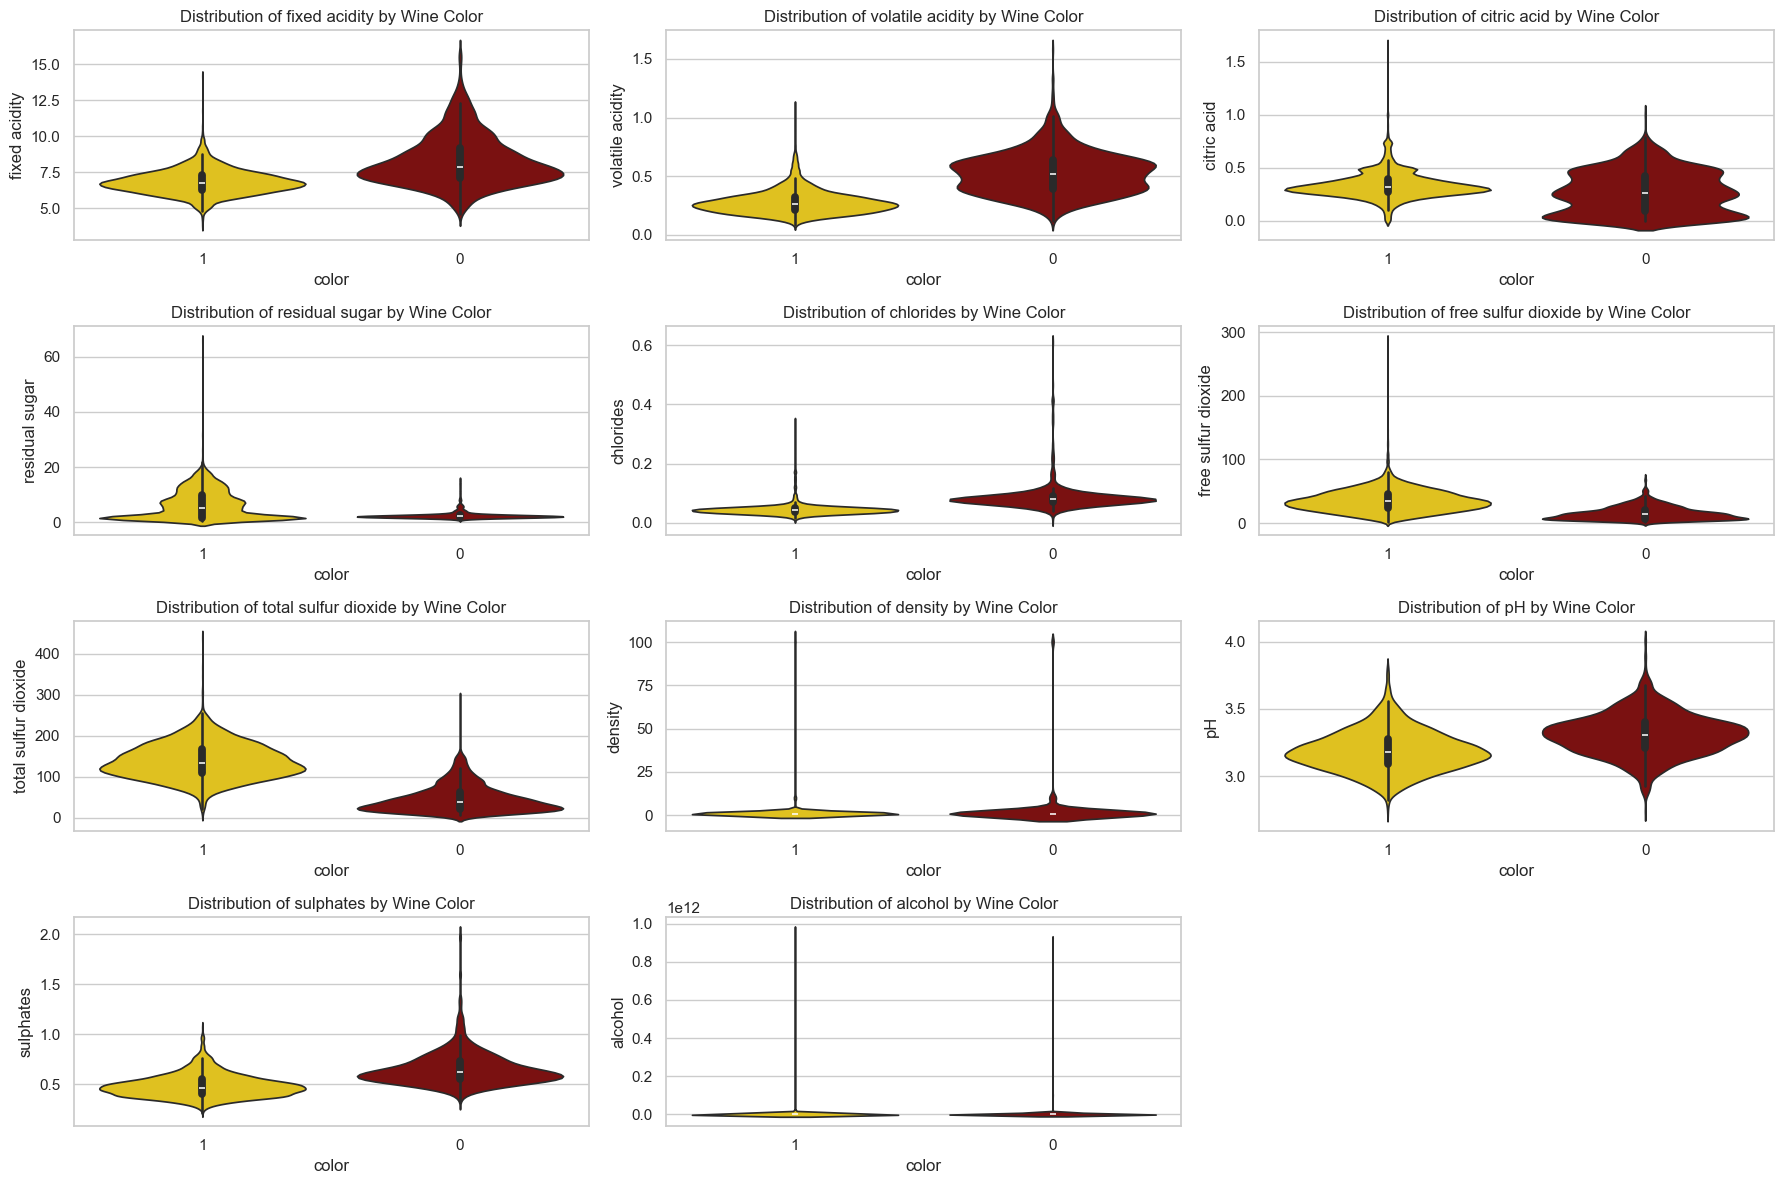

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data_path = 'winequality-merged.csv'  # Ajuste o caminho do arquivo conforme necessário
wine_data = pd.read_csv(data_path)

# Mapear 'color' para numérico para facilitar a visualização
wine_data['color'] = wine_data['color'].map({'red': '0', 'white': '1'})  # Usar string para compatibilidade

# Configurar o ambiente de visualização
sns.set(style="whitegrid")

plt.figure(figsize=(18, 12))
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Violin plots para ver a distribuição das características com respeito ao tipo de vinho
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features_to_plot):
    plt.subplot(4, 3, i + 1)
    sns.violinplot(x='color', y=feature, data=wine_data, hue='color', palette={'0': "darkred", '1': "gold"}, dodge=False)
    plt.title(f'Distribution of {feature} by Wine Color')
    plt.legend([],[], frameon=False)  # Remover a legenda se for redundante
plt.tight_layout()
plt.show()


In [171]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

data_path = 'winequality-merged.csv'  # Ajuste o caminho do wine_data conforme necessário
wine_data = pd.read_csv(data_path)

# Separar features (X) e rótulo (y)
X = wine_data.drop(columns=['color'])  # Mantemos todas as features, exceto a cor
y = wine_data['color']  # Nosso target será a cor (0 = Red, 1 = White)

# Verificar a distribuição antes do SMOTE
print("Distribuição original das classes:", Counter(y))


# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados para melhor performance do KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo KNN com os dados balanceados
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', leaf_size=10, p=1)  # Pode ajustar 'n_neighbors' para otimizar
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("\n📌 Acurácia do modelo KNN antes do SMOTE:", accuracy)
print("\n📌 Relatório de classificação:\n", classification_report(y_test, y_pred, target_names=['Red', 'White']))

from sklearn.metrics import confusion_matrix, classification_report

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Gerar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir matriz de confusão
print("📊 Matriz de Confusão:")
print(conf_matrix)

Distribuição original das classes: Counter({'white': 4898, 'red': 1599})

📌 Acurácia do modelo KNN antes do SMOTE: 0.9930769230769231

📌 Relatório de classificação:
               precision    recall  f1-score   support

         Red       0.98      0.99      0.99       314
       White       1.00      0.99      1.00       986

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

📊 Matriz de Confusão:
[[311   3]
 [  6 980]]


In [172]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Definir Stratified K-Fold para garantir proporção das classes
folds = [3, 5, 7, 10, 20]
results = {}

for fold in folds:
    skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)
    results[fold] = scores.mean()

# Criar DataFrame para visualizar os resultados
cv_results = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy'])
cv_results.index.name = 'Folds'

# Exibir os resultados diretamente
print(cv_results)


       Mean Accuracy
Folds               
3           0.991726
5           0.992496
7           0.992881
10          0.992687
20          0.993264


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir os hiperparâmetros a serem testados no Grid Search
param_grid = {
    'n_neighbors': [3,4,5,6,7,8,9,10, 11],  # Testar diferentes números de vizinhos
    'weights': ['uniform', 'distance'],  # Testar diferentes estratégias de ponderação
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Testar diferentes métricas de distânciac
    'leaf_size' : [10,20,30,40,50,60],
    'p' : [1,2]
}

# Criar o modelo KNN
knn = KNeighborsClassifier()

# Criar o Grid Search com validação cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Executar o Grid Search
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Melhores hiperparâmetros: {best_params}")
print(f"Melhor acurácia no Grid Search: {best_score:.4f}")


Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Melhor acurácia no Grid Search: 0.9935


c:\Users\touri\OneDrive\Desktop\KNNwineColor\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.99114829 0.99211039 0.99114829 ... 0.99230288 0.99018527 0.99172485]
  warnings.warn(


In [174]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar features (X) e rótulo (y)
X = wine_data.drop(columns=['color'])  # Mantemos todas as features, exceto a cor
y = wine_data['color']  # Nosso target será a cor (0 = Red, 1 = White)

# Verificar a distribuição antes do SMOTE
print("Distribuição original das classes:", Counter(y))

# Aplicar SMOTE para balancear as classes
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a distribuição após o SMOTE
print("Distribuição após SMOTE:", Counter(y_resampled))

# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Padronizar os dados para melhor performance do KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo KNN com os dados balanceados
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', leaf_size=10, p=1)  # Pode ajustar 'n_neighbors' para otimizar
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("\n📌 Acurácia do modelo KNN após SMOTE:", accuracy)
print("\n📌 Relatório de classificação:\n", classification_report(y_test, y_pred, target_names=['Red', 'White']))

from sklearn.metrics import confusion_matrix, classification_report

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Gerar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir matriz de confusão
print("📊 Matriz de Confusão:")
print(conf_matrix)

Distribuição original das classes: Counter({'white': 4898, 'red': 1599})
Distribuição após SMOTE: Counter({'white': 4898, 'red': 4898})

📌 Acurácia do modelo KNN após SMOTE: 0.9948979591836735

📌 Relatório de classificação:
               precision    recall  f1-score   support

         Red       0.99      1.00      0.99       947
       White       1.00      0.99      1.00      1013

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960

📊 Matriz de Confusão:
[[ 944    3]
 [   7 1006]]


In [175]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
import pandas as pd

# Carregar o dataset
data_path = 'winequality-merged.csv'
wine_data = pd.read_csv(data_path)

# Mapear 'color' para numérico (0 = Red, 1 = White)
wine_data['color'] = wine_data['color'].map({'red': 0, 'white': 1})

# Separar features (X) e rótulo (y)
X = wine_data.drop(columns=['color'])
y = wine_data['color']

# Dividir o conjunto original (sem SMOTE) para avaliação da generalização
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE no conjunto de treino
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Distribuição original:", Counter(y))
print("Distribuição após SMOTE:", Counter(y_resampled))

# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Treinar o modelo com os hiperparâmetros otimizados pelo GridSearch
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance', leaf_size=10, p=1)
knn.fit(X_train_scaled, y_train)

# Avaliação no conjunto balanceado (SMOTE)
y_pred = knn.predict(X_test_scaled)
print("\n📌 Acurácia no conjunto balanceado (SMOTE):", accuracy_score(y_test, y_pred))
print("\n📌 Relatório de classificação (SMOTE):\n", classification_report(y_test, y_pred, target_names=['Red', 'White']))
print("📊 Matriz de Confusão (SMOTE):")
print(confusion_matrix(y_test, y_pred))

# Avaliação no conjunto original (não balanceado)
X_orig_scaled = scaler.transform(X_orig_test)
y_orig_pred = knn.predict(X_orig_scaled)
print("\n📌 Acurácia no conjunto original (não balanceado):", accuracy_score(y_orig_test, y_orig_pred))
print("\n📌 Relatório de classificação (Original):\n", classification_report(y_orig_test, y_orig_pred, target_names=['Red', 'White']))
print("📊 Matriz de Confusão (Original):")
print(confusion_matrix(y_orig_test, y_orig_pred))


Distribuição original: Counter({1: 4898, 0: 1599})
Distribuição após SMOTE: Counter({1: 4898, 0: 4898})

📌 Acurácia no conjunto balanceado (SMOTE): 0.9948979591836735

📌 Relatório de classificação (SMOTE):
               precision    recall  f1-score   support

         Red       0.99      1.00      0.99       947
       White       1.00      0.99      1.00      1013

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960

📊 Matriz de Confusão (SMOTE):
[[ 944    3]
 [   7 1006]]

📌 Acurácia no conjunto original (não balanceado): 0.9984615384615385

📌 Relatório de classificação (Original):
               precision    recall  f1-score   support

         Red       0.99      1.00      1.00       320
       White       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00 

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Carregar o dataset
data_path = 'winequality-merged.csv'
wine_data = pd.read_csv(data_path)

# Mapear 'color' para numérico (0 = Red, 1 = White)
wine_data['color'] = wine_data['color'].map({'red': 0, 'white': 1})

# Selecionar apenas as features mais importantes identificadas anteriormente
features = ['total sulfur dioxide', 'residual sugar', 'free sulfur dioxide', 
            'volatile acidity', 'citric acid']

X = wine_data[features]
y = wine_data['color']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados para melhor desempenho do KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn.fit(X_train_scaled, y_train)

# Escolher uma amostra aleatória para teste
random_sample_idx = np.random.randint(0, len(X_test))  # Selecionar índice aleatório
sample_features = X_test.iloc[random_sample_idx].to_frame().T  # Manter os nomes das colunas

# Padronizar a amostra antes de prever
sample_features_scaled = scaler.transform(sample_features)  # Agora os nomes das colunas são mantidos

# Fazer a previsão da classe do vinho
predicted_class = knn.predict(sample_features_scaled)[0]

# Converter para rótulo de vinho
predicted_label = 'White' if predicted_class == 1 else 'Red'
real_label = 'White' if y_test.iloc[random_sample_idx] == 1 else 'Red'

# Exibir os resultados
print(f"🎯 **Previsão do Modelo:** {predicted_label}")
print(f"✅ **Cor Real do Vinho:** {real_label}")
print(f"🔬 **Valores das Features da Amostra Testada:**")
for feature, value in zip(features, sample_features.values[0]):
    print(f"   {feature}: {value:.2f}")

🎯 **Previsão do Modelo:** White
✅ **Cor Real do Vinho:** White
🔬 **Valores das Features da Amostra Testada:**
   total sulfur dioxide: 116.00
   residual sugar: 1.10
   free sulfur dioxide: 48.00
   volatile acidity: 0.14
   citric acid: 0.32


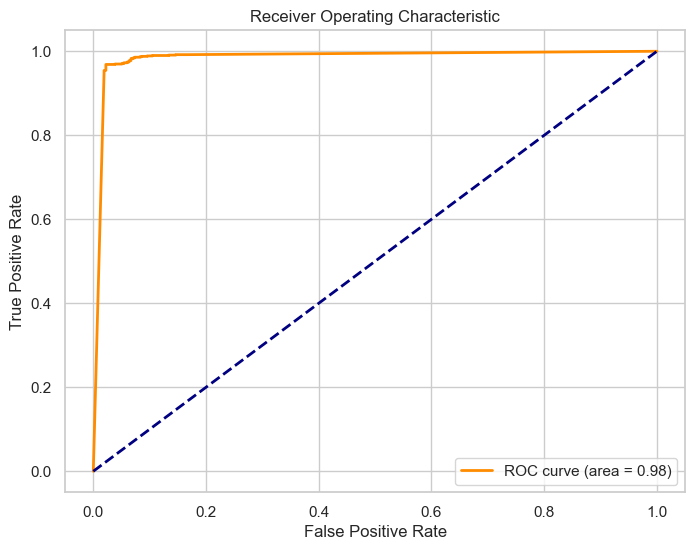

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc


y_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Calcular FPR, TPR e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
